[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


('Gutenberg ID"s: [\'austen-emma.txt\', \'austen-persuasion.txt\', '
 "'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', "
 "'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', "
 "'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', "
 "'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', "
 "'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', "
 "'shakespeare-macbeth.txt', 'whitman-leaves.txt']")
Top 30 words from ebook 1:
[('little', 45), ('thee', 42), ('like', 35), ('thou', 35), ('thy', 31), ('love', 29), ('sweet', 28), ('night', 28), ('joy', 25), ('away', 24), ('weep', 24), ('father', 22), ('sleep', 21), ('happy', 19), ('shall', 19), ('day', 19), ('mother', 19), ('child', 18), ('every', 17), ('never', 17), ('thel', 16), ('hear', 16), ('green', 16), ('voice', 16), ('infant', 16), ('see', 16), ('human', 16), ('cloud', 15), ('lamb', 15), ('till', 15)]

Top 30 words from ebook 2:
[('emma', 855), ('could', 836), ('would'

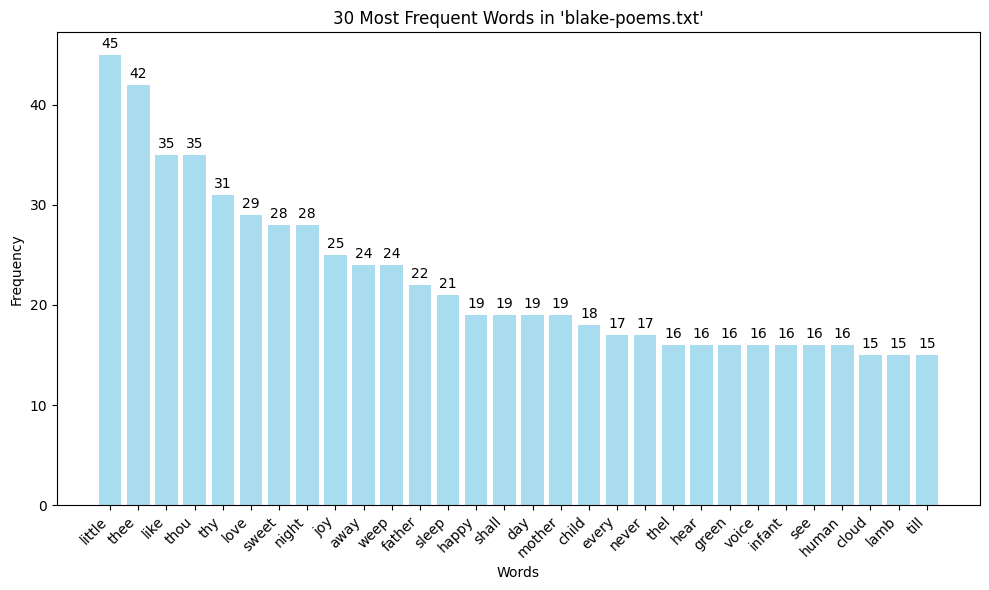

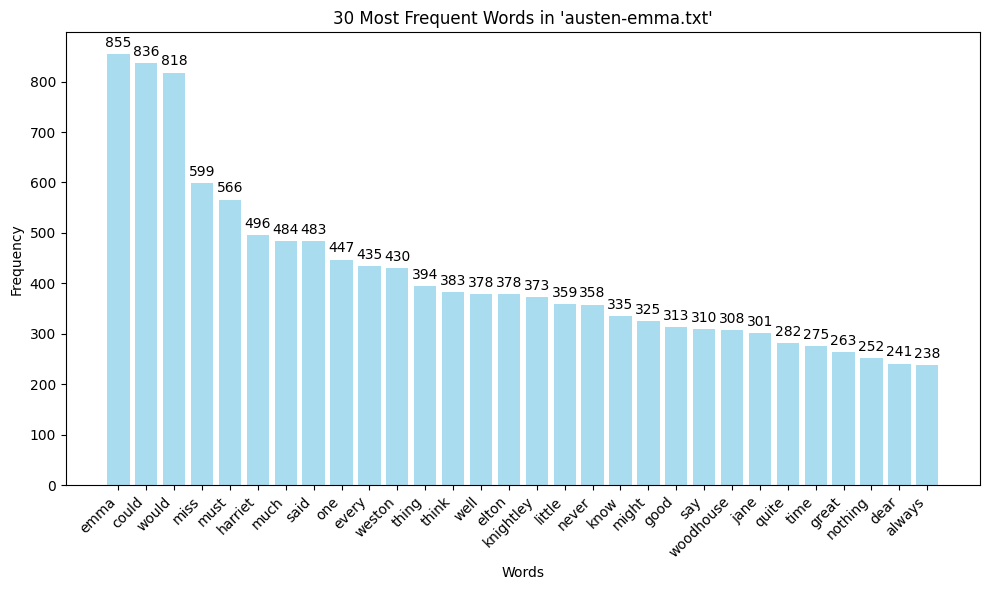

In [1]:
"""
Question: This project investigates the poetry properties such as style, rhyme, emotion using Python NLTK,
any other relevant packages and should show ability to handle big data using embeddings.
For this purpose, consider the Gutenberg collection of ebooks available at http://www.gutenberg.org/.
You may notice that for each ebook, you can freely download the full text version of the book.
Choose two poetry ebooks of your choice from two different topics (ideally contrasting topics)
where each poetry book is made of several chapters, avoiding very short files and download their associated text files.
Notice that Gutenberg collection can be accessed in NLTK too (from nltk.corpus import gutenberg).
The following specifications should be performed for each ebook.
"""







# Importing the libraries
import nltk
import pprint
from nltk.corpus import stopwords
from nltk.corpus import gutenberg
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import re




# Preprocessing So we are downloading the dataset using the below code instead of downloading it manually.

# Downloading the gutenberg.
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')

# Below code will print all the books-ids which are offering by the gutenberg
pprint.pprint(f'Gutenberg ID"s: {gutenberg.fileids()}')



def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]  # Remove the punctuations and numeric words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords from nltk
    return words

def plotting_histogram(title, top30_words):
    words, frequencies = zip(*top30_words)

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a bar plot with custom colors, labels, and title
    bars = ax.bar(words, frequencies, color='skyblue', alpha=0.7)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Add labels and title
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")
    ax.set_title(f"30 Most Frequent Words in '{title}'")

    # Annotate the bars with their values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Display the plot
    plt.tight_layout()
    plt.show()

ebook_name_1 = "blake-poems.txt"
ebook_name_2 = "austen-emma.txt"

# Reading the raw books:
ebook1 = gutenberg.raw(ebook_name_1)
ebook2 = gutenberg.raw(ebook_name_2)

# Preprocessing the text.
ebook1_words = preprocess_text(ebook1)
ebook2_words = preprocess_text(ebook2)

# Calculating the frequency distribution:

# Calculate frequency distribution and it will tell frequency distribution
fdist1 = FreqDist(ebook1_words)
fdist2 = FreqDist(ebook2_words)

top30_words_ebook1 = fdist1.most_common(30)
top30_words_ebook2 = fdist2.most_common(30)
print(f"Top 30 words from ebook 1:\n{top30_words_ebook1}\n")
print(f"Top 30 words from ebook 2:\n{top30_words_ebook2}\n")

# Plot histograms
plotting_histogram(ebook_name_1,top30_words_ebook1)
plotting_histogram(ebook_name_2,top30_words_ebook2)


# Create DataFrames for each eBook
df_ebook1 = pd.DataFrame(top30_words_ebook1, columns=["Word", "Frequency in eBook 1"])
df_ebook2 = pd.DataFrame(top30_words_ebook2, columns=["Word", "Frequency in eBook 2"])

# Merge the DataFrames
result_df = df_ebook1.merge(df_ebook2, on="Word", how="outer")

# Save the results to an Excel file
result_df.to_excel("top30_words_frequency.xlsx", index=False)

